# Solving Equilibrium Problems with Machine Learning

Machine Learning Fundamentals for Economists

Jesse Perla (University of British Columbia)

# Problem Formulation

## Broader Program of Quantitative Macroeconomics

-   The primary goal is to conduct counterfactual experiments, and
    understanding of mechanisms, through an artificial laboratory
-   Economic questions are often asked as:
    -   Low dimensional conditional expectations/etc. of possibly
        high-dimensional stochastic processes

## High-Dimensional Models of Economic Dynamics

-   Recursive formulations, no heuristic approximations
-   Functional equation:
    $\ell : \mathcal{F} \times {\mathcal{X}}\to {\mathbb{R}}$, scalar
    $\ell(\cdot) \geq 0$ without loss of generality

$$
\ell(f, X) = 0 \quad \text{for all } X \in {\mathcal{X}}
$$

-   $X \in {\mathcal{X}}$ is the state (e.g., ${\mathbb{R}}^N$ for
    capital of $N$ firms, idiosyncratic states, or entire distributions)
-   $f \in \mathcal{F}$ is one or more functions of the state (e.g.,
    capital investment, value functions)
-   $\ell(\cdot, \cdot)$ stacks structural equations:
    -   Bellman equations, Euler equations
    -   Market clearing conditions
    -   Fixed points, implicit functions

## Law of Motion and Expectations

-   The $\ell(\cdot, \cdot)$ contains some calculations specific to
    economic dynamics:

    $$
      X' = \Gamma(X, W, \omega; f)
      $$

    -   $W$ possibly high-dimensional “idiosyncratic” shocks
    -   $\omega$: aggregate shocks

-   Conditional expectations of future states:

    $$
      {\mathbb{E}_{{}}\left[ {g(X') \mid X} \right]} = {\mathbb{E}_{{}}\left[ {g(\Gamma(X, W, \omega; f)) \mid X} \right]}
      $$

-   Implicit functions (fixed points, market clearing) conditional on
    $f$

# Global Solutions and the Curse of Dimensionality

## **Question**: How to find “global solution”, $f$, where $\ell(f,X) \approx 0$ on arbitrary points $X$ in a high-dimensional ${\mathcal{X}}$?

## **Answer**: You can’t. The curse of dimensionality is inescapable.

### For that particular goal, it is far worse than you think

## Distinct Aspects of the Curse of Dimensionality

-   Parameterized approximation $f_{\theta}\in{\mathcal{H}}(\Theta)$ and
    $M$ points/samples ${\mathcal{D}}\subset {\mathcal{X}}$
-   Many algorithms (e.g., Chebyshev polynomials+collocation nodes,
    neural networks) solve

$$
\min_{\theta} \frac{1}{|{\mathcal{D}}|}\sum_{X \in {\mathcal{D}}} \ell(f_{\theta},X),\quad \text{nesting }{\mathbb{E}_{{}}\left[ {q(X,W)\,|\,X} \right]} \approx \sum_{s=1}^S \alpha_s q(X,W_s)
$$

-   Do the following need to increase **exponentially with $N$**?

    1.  The cost of optimization (perhaps as $M$ or $\theta$ grows)
    2.  The size and flexibility of ${\mathcal{H}}(\Theta)$ (e.g., a
        coefficient per node $M$ used in collocation)
    3.  $M$, the number of grid points or samples in ${\mathcal{D}}$
    4.  $S$, the number of quadrature points/samples for expectations at
        each $X\in{\mathcal{D}}$

## Optimization is Not Inherently a Challenge

-   By this point in the course, we are not scared of parameterization.
    -   [High-dimensional optimization](../slides/optimization.qmd) with
        $\partial_{\theta}\ell(f_{\theta},\cdot)$ can be independent of
        $N$ via [VJPs](../slides/differentiation.qmd#frechet)
    -   [Sum-decomposable
        objectives](../slides/optimization.qmd#finite-sum-objectives)
        like
        $\frac{1}{|{\mathcal{D}}|}\sum_{X \in {\mathcal{D}}} \ell(f_{\theta},X)$
        can use approximate gradients
-   In fact, optimization is often easier in higher dimensions
    -   More parameters = more degrees of freedom
    -   Multiplicity with massive $\theta$ can even work to our
        advantage in some cases
-   So a reasonable assumption that the $\min_{\theta} = 0$ (i.e.,
    “interpolating” solution) possible for many different $\theta$

## Parameterization is Also Not Cursed (Especially in Practice)

-   “Universal Approximation” theorems (mostly) about bias. Changing
    ${\mathcal{H}}(\Theta)$ until $f_{\theta}\approx f$
    -   **Question:** Can you approximate any function in $\mathcal{F}$
        and how does this scale with $N$?
    -   **Answer:** Mostly yes. Sometimes just asymptotic in size of
        $\theta$. Often without exponential increase in $N$ for many
        ${\mathcal{H}}(\Theta)$ (e.g., kernels, neural networks)  
-   Theorems are encouraging, but **vacuous**. No practical guidance on
    bounds or intuition
    -   Often true but generic (e.g., apply to neural networks, splines
        and/or kernels)
    -   Neural networks work far, far better in practice than these
        theorems suggest

## Remaining Challenges: Generalization and Integration

-   The remaining concerns are generalization from ${\mathcal{D}}$ to
    ${\mathcal{X}}$ (i.e., $M$ and $S$ scaling with $N$)
-   So in principle we can solve large optimization problems and have
    sufficiently flexible approximations
    -   Not universally true, but will be the case for most macro
        applications
    -   Failures typically involve requirement for maintaining hard
        combinatorial constraints, costless off-equilibrium behavior
        anywhere in a large dimensional state-space
-   Which leaves the two key challenges for solving these types of
    methods:
    1.  $M$, the number of grid points or samples in ${\mathcal{D}}$
    2.  $S$, the number of quadrature points/samples for expectations at
        each $X\in{\mathcal{D}}$

## Reminder: [High-Dimensional Geometry/Probability](high_dimensional_probability.qmd)

-   Recall that in high dimensions, “most” of the volume of a hypercube
    is [in the corners](#all-corners)
    -   Suggests that for many economic problems we cannot hope to cover
        ${\mathcal{X}}$ uniformly with a finite $M$. Global” solutions
        seem impossible
-   But for high-dimensional stochastic processes, most of the
    probability mass
    [“concentrates”](../slides/high_dimensional_probability.qmd#concentration-of-measure)
    in tiny regions of the space
    -   So perhaps we do not need to worry about covering all of
        ${\mathcal{X}}$ uniformly
-   Will show this “concentration” logic hels both the function
    approximation of $f_{\theta}$ and calculating
    ${\mathbb{E}_{{}}\left[ {\cdot} \right]}$
    -   Often have a “blessing of dimensionality” instead
    -   Caveat: sensitive to the underlying
        distributions[misspecification](../slides/high_dimensional_probability.qmd#concentration-double-edged)

# Statistical Learning Formulation

## From Uniform to Statistical

-   Old (unattainable) goal: $\ell(f, X) \approx 0$ for all
    $X \in {\mathcal{X}}$

$$
\arg\min_{f \in \mathcal{F}} \sup_{X \in {\mathcal{X}}} \ell(f, X)
$$

-   Instead, solve

    $$
      {f^*}\equiv \arg\min_{f \in \mathcal{F}} {\mathbb{E}_{{X \sim \mu^*(\cdot;{f^*})}}\left[ {\ell(f, X)} \right]}
      $$

    -   $\mu^*$ = “population distribution” - key departure from
        traditional methods
    -   We assume an interpolating solution exists: $\ell({f^*}, X) = 0$
        for all $X \in {\mathcal{X}}$
    -   $f(X)$ with $X \sim \mu^*$ might be “concentrated”

## Empirical Risk Minimization (ERM)

-   Classic approach is to
    -   Choose parameterized function
        $f_\theta \in {\mathcal{H}}(\Theta)$ (e.g., neural networks,
        polynomials)
    -   Take points ${\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mu^*$,
        minimize empirical risk: [<span class="button">Error
        Decomposition</span>](#sec-err-decomp)

$$
{\theta^*}\equiv \arg\min_{\theta \in \Theta} \frac{1}{|{\mathcal{D}}|} \sum_{X \in {\mathcal{D}}} \ell(f_\theta, X)
$$

-   This looks like the old optimization problem - what’s different?
    -   **Crucially**: ${\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mu^*$
        makes this approximate risk minimization
    -   Nests traditional methods: Chebyshev nodes on hypercube
        $\approx$ uniform $\mu^*$
-   While a common objective, is this correctly specified here?

## Dependence of the Population Distribution on the Solution

-   The $\mu^*(\cdot; {f^*})$ often depends on the solution ${f^*}$
    itself
    -   E.g., in macro models, $\mu^*$ might be generated from
        trajectories of an initial condition
    -   In some cases could use a stationary distribution (but be
        careful!)
-   Challenge is that you need to take the $\grad_\theta$ of the samples
    from $\mu^*(\cdot; f_\theta)$
    -   See [previous
        lecture](../slides/optimization.qmd#score-function-estimation-(reinforce))
        on REINFORCE

## A Means to an End?

-   We don’t actually care about the $$
    {\theta^*}\equiv \arg\min_{\theta \in \Theta} \frac{1}{|{\mathcal{D}}|} \sum_{X \in {\mathcal{D}}} \ell(f_\theta, X)
    $$

-   Alternative objectives generate better representations, adjust for
    bias, etc.

## Decomposing the Errors Reminder from [this lecture](../slides/intro_to_ml.qmd)

-   Two sources of approximation error (bias-variance tradeoff):
    1.  **Approximation error ${\varepsilon_{\mathrm{app}}}$** (bias):
        $f_{{\theta^*}} \in {\mathcal{H}}(\Theta)$ may not represent
        ${f^*}$
    2.  **Generalization error ${\varepsilon_{\mathrm{gen}}}$**
        (variance): Finite sample
        ${\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mu^*$
-   Decomposition following @bottou2007tradeoffs, @probml1:

$$
\small
{\mathbb{E}_{{{\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mu^*}}\left[ {\min_\theta \hat{R}(\theta, {\mathcal{D}}) - \min_f R(f, \mu^*)} \right]} = \underbrace{R({f_{{\theta^*}}}, \mu^*) - R({f^*}, \mu^*)}_{{\varepsilon_{\mathrm{app}}}({f_{{\theta^*}}})} + \underbrace{{\mathbb{E}_{{{\mathcal{D}}}}\left[ {\hat{R}({\theta^*}, {\mathcal{D}}) - R({f_{{\theta^*}}}, \mu^*)} \right]}}_{{\varepsilon_{\mathrm{gen}}}({f_{{\theta^*}}})}
$$

-   Modern ML shows we can often reduce both (double-descent, inductive
    bias)
-   With flexible ${\mathcal{H}}(\Theta)$ like neural networks: often
    ${\varepsilon_{\mathrm{app}}}({f_{{\theta^*}}}) \approx 0$
-   Then error is
    ${\varepsilon_{\mathrm{gen}}}({f_{{\theta^*}}}) \approx \hat{R}({\theta^*}, {\mathcal{D}}) - \hat{R}({\theta^*}, {\mathcal{D}_{\mathrm{test}}})$

## Sensitivity to $\mu^*$

-   Misspecification of $\mu^*$ usually innocuous for small $N$ if
    $|{\mathcal{D}}|$ is large
-   With large $N$, small changes in $\mu^*$ can have dramatic effects
    -   Unless $|{\mathcal{D}}| \propto \exp(N)$
-   Recall from [previous lecture](high_dimensional_probability.qmd):
    -   Small mean shifts cause distance $\epsilon\sqrt{N}$ between
        distributions
    -   Small variance differences cause complete separation
-   Key insight: in high dimensions, **matching $\mu^*$ matters more
    than $|{\mathcal{D}}|$**

## Key Tradeoffs

-   No “global” solutions $\implies$ cannot conduct arbitrary
    counterfactuals
    -   But may cover all economically relevant states for particular
        questions
-   Sensitivity “out of distribution”: all bets are off if $\mu^*$
    changes
    -   Key is matching $\mu^*$ for counterfactuals of interest, not
        size of ${\mathcal{D}}$
-   Finding appropriate ${\mathcal{D}}$ is challenging due to feedback
    -   See @taming for approaches

# Neural Networks and Representations

## NN Often Needed in Practice, Not in Theory

-   Neural networks are a very flexible class ${\mathcal{H}}(\Theta)$
    -   Encapsulating polynomials, splines, etc.
    -   Many parameters, even $|\Theta| \gg |{\mathcal{D}}|$
-   Continuum of $\theta$ with $\ell(f_\theta, X) \approx 0$ for all
    $X \in {\mathcal{D}}$
-   Regularization/inductive bias select particular solutions
-   “Universal approximation” theorems are encouraging but **vacuous**
    -   No practical guidance on bounds

## Mental Model: Representation Learning

-   Think of neural networks as nested approximations:

$$
f_\theta(X) \equiv g_\theta(h_\theta(X))
$$

-   $h_\theta : {\mathcal{X}}\to {\mathbb{R}}^L$ maps state to latent
    **representation**
-   $g_\theta : {\mathbb{R}}^L \to {\mathbb{R}}$ maps representation to
    output/policy
-   Both are very flexible (many parameters, nonlinear compositions)

## Deep Learning Can “Find the State”

-   Nesting in $h_\theta(\cdot)$ can learn ideal transformations of
    state space
-   $h_\theta$ may map $X$ to a place where it is less lonely:
    -   $L$ might be lower-dimensional
    -   $\{h_\theta(X) : X \in {\mathcal{D}}\}$ might be close to
        low-dimensional manifold
-   Advantages over manually crafting representations (“finding the
    state is an art”):
    -   May be difficult to find right simplification in complicated
        state spaces
    -   Simplifications may only hold approximately
    -   Ideal representation may depend on $\mu^*$

## Robustness of Good Representations

-   Unless $|{\mathcal{D}}| \propto \exp(N)$, even
    $\text{Hull}({\mathcal{D}})$ has vanishing volume
-   But what really matters is variation in the **latent space** induced
    by $h_\theta(X)$
-   If representation is sufficient for task, small ${\mathcal{D}}$ may
    provide sufficient variation

<figure>
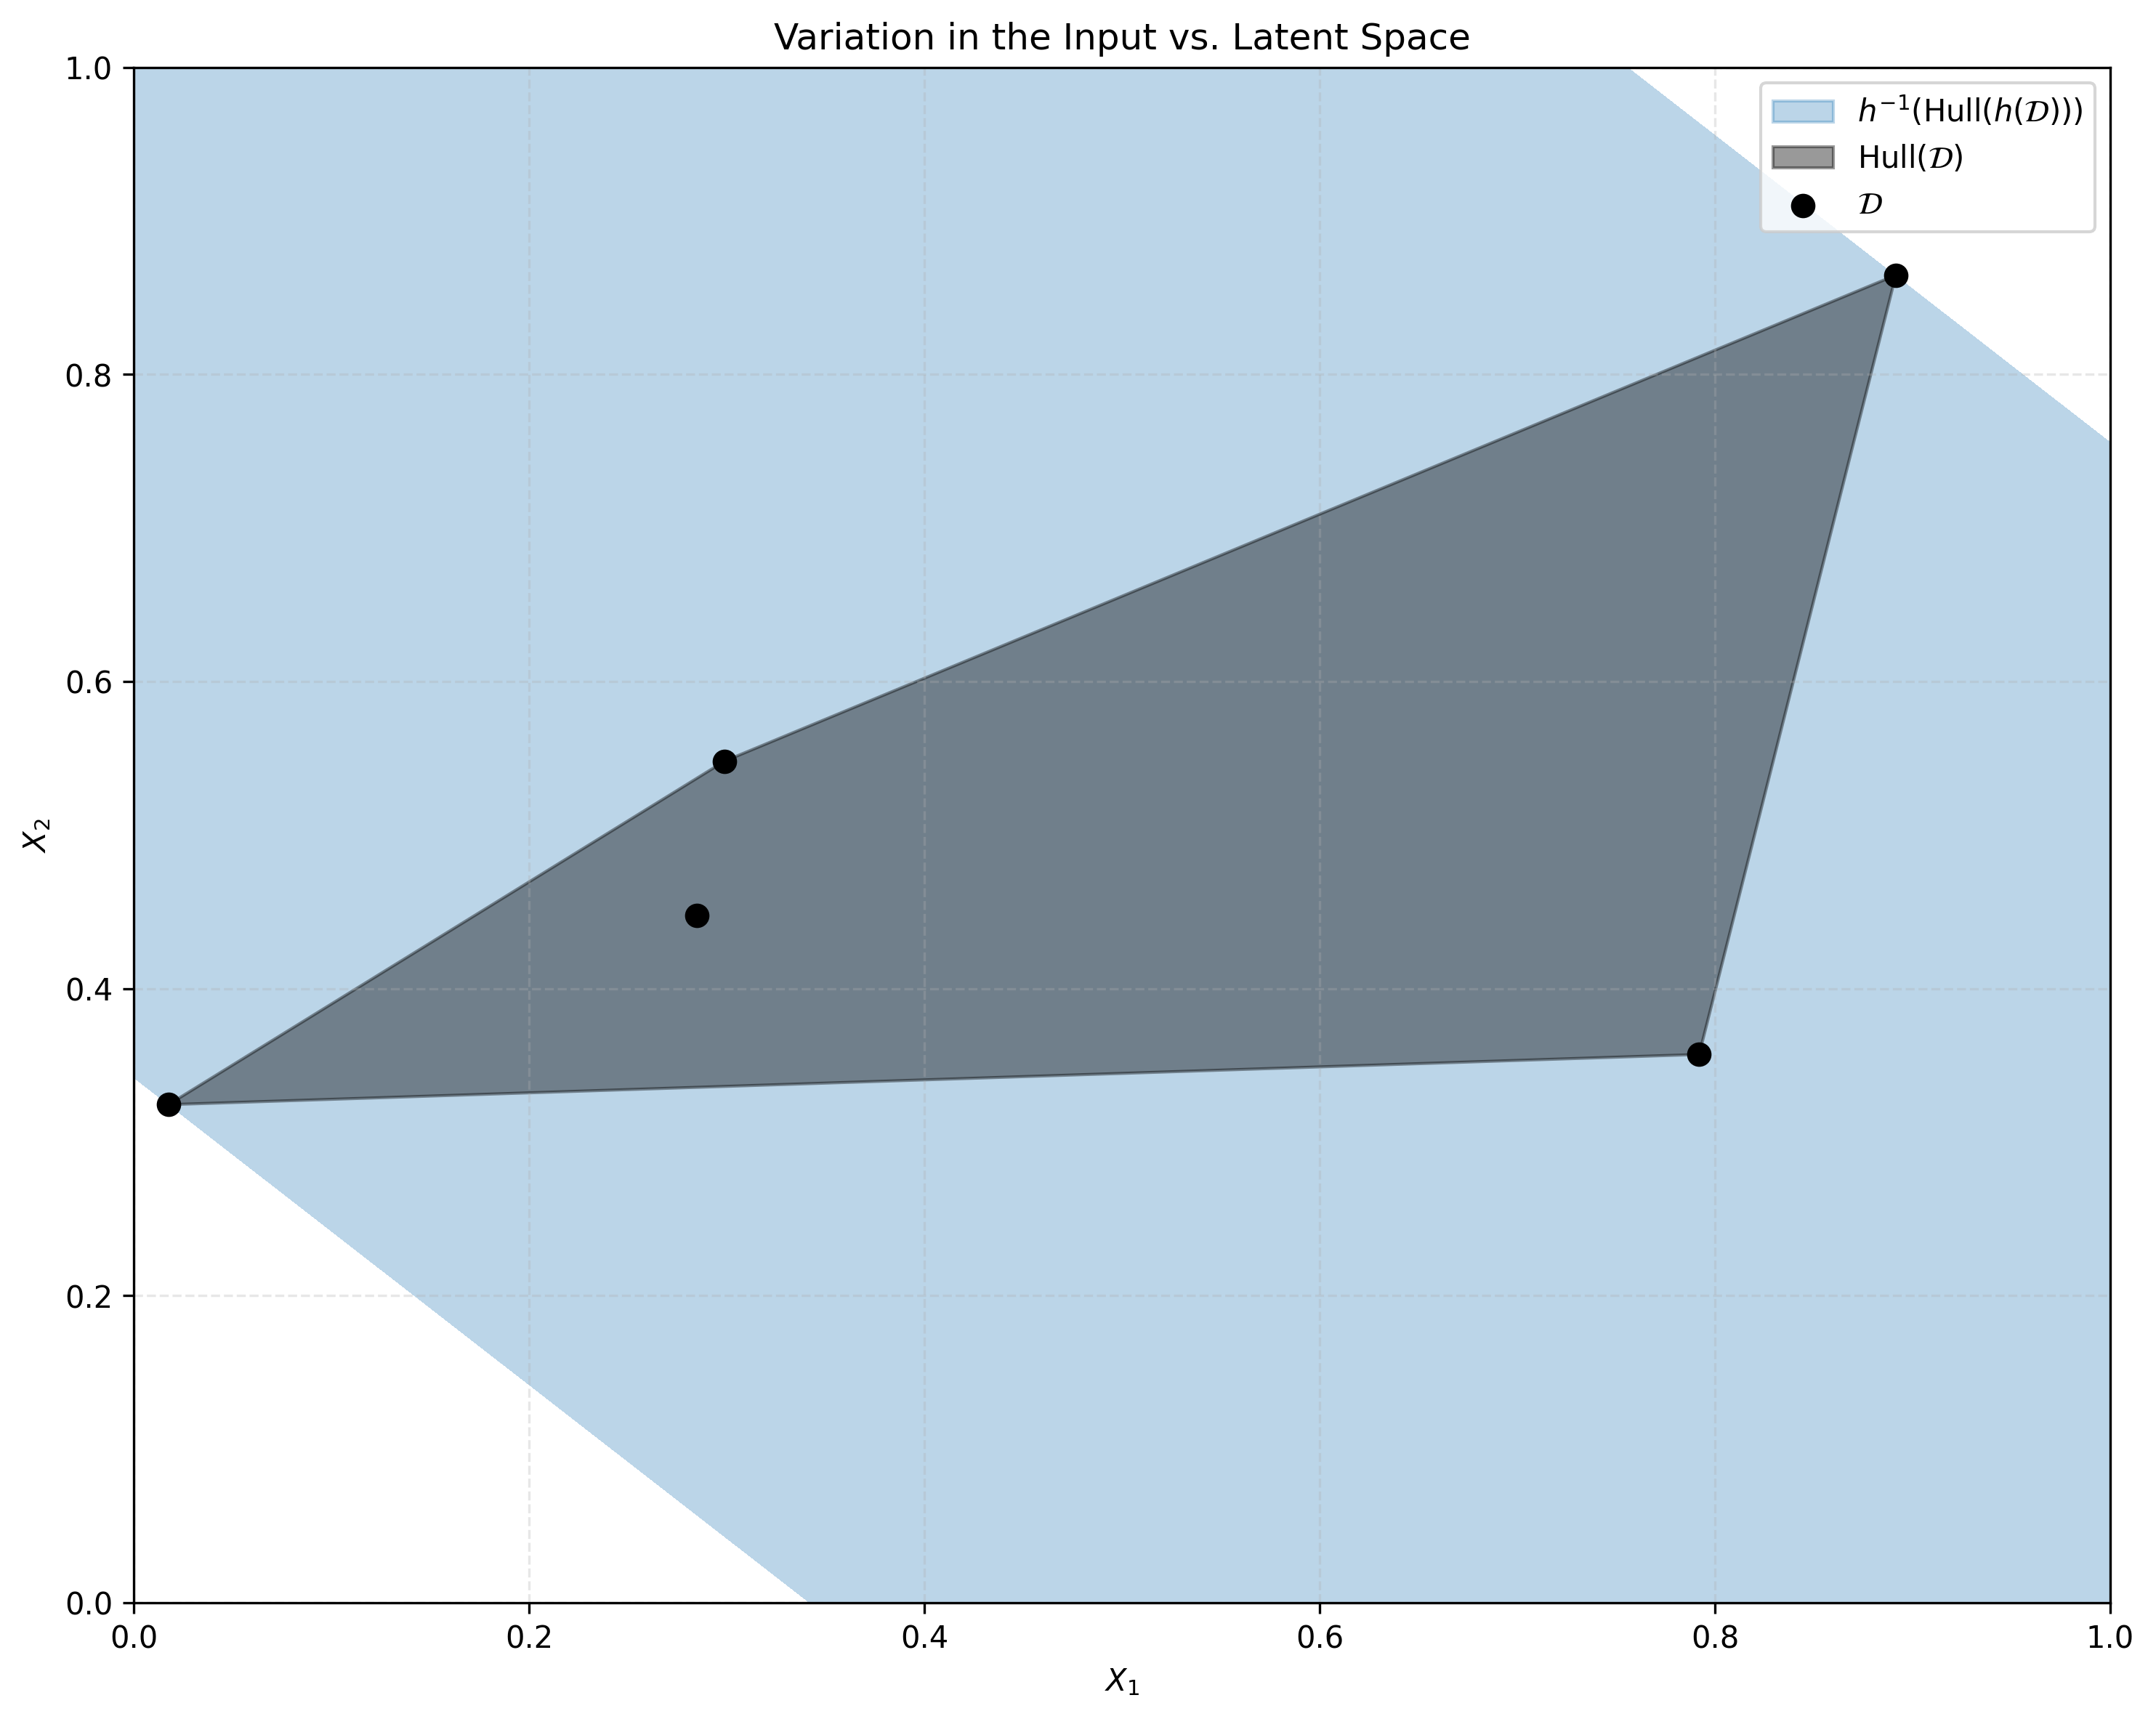
<figcaption aria-hidden="true">Variation in latent space matters more
than <span class="math inline">|𝒟|</span></figcaption>
</figure>

-   e.g., $h(X) = \frac{1}{2}(X_1 + X_2)$ latent,
    ${\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mathcal{U}[0,1]^2$
-   Blue region: points in ${\mathcal{X}}$ that map inside hull of data
    in representation space

# Permutation Invariance

## Motivation

-   **“To a macroeconomist, a firm is a nameless point in a histogram”**
-   Payoff functions often symmetric: market clearing depends on
    supply/demand, not firm names
-   Permutations are one of many invariances - see
    @bloem2019probabilistic

## Definition: Permutation Invariance and Equivariance

Let $\mathcal{S}_N$ be the set of all $N!$ permutation matrices of size
$N \times N$.

> **Definition: Permutation Invariance and Equivariance**
>
> -   $f : {\mathbb{R}}^N \to {\mathbb{R}}$ is **permutation invariant**
>     if, for all $\pi \in \mathcal{S}_N$:
>
> $$
> f(\pi X) = f(X)
> $$
>
> -   $f : {\mathbb{R}}^N \to {\mathbb{R}}^N$ is **permutation
>     equivariant** if, for all $\pi \in \mathcal{S}_N$:
>
> $$
> f(\pi X) = \pi f(X)
> $$

-   Example: price function
    $p(X) \equiv 1 - \frac{1}{N}\sum_{n=1}^N |X_n|^\nu$ is permutation
    invariant

## Representation Theorem

> **Proposition: Permutation Invariant Representation (@zaheer2017deep,
> @wagstaff2019limitations)**
>
> Let $f : {\mathbb{R}}^{N+1} \to {\mathbb{R}}$ be continuous and
> permutation-invariant under $\mathcal{S}_N$. Then there exist
> $L \leq N$ and continuous functions
> $\rho : {\mathbb{R}}^{L+1} \to {\mathbb{R}}$ and
> $\phi : {\mathbb{R}}\to {\mathbb{R}}^L$ such that:
>
> $$
> f(x, X) = \rho\left(x, \frac{1}{N}\sum_{n=1}^N \phi(X_n)\right)
> $$

-   Any permutation invariant function can be represented as:
    1.  Apply $\phi$ to each element → map to ${\mathbb{R}}^L$
    2.  Aggregate (mean, sum, max) pointwise in $L$ to get latent state
    3.  Function $\rho$ maps latent state and other inputs to output

## Dimension Reduction?

-   This is a pointwise representation theorem motivating choice of
    $h_\theta$ and $g_\theta$
-   Note:
    $\bar{\phi}(X) \equiv \frac{1}{N}\sum_{x \in X} \phi(x) \in {\mathbb{R}}^L$
    maps to $h_\theta$ in our mental model
    -   Interpretation: calculating $L$ statistics about distribution
        **within** $X$
-   $L \leq N$ is **worst-case**. Some $f$ and $\rho$ need $N$ summary
    statistics
-   When $L$ unknown, choose some $\hat{L}$
    -   What if $\hat{L} \neq L$? Does $\hat{L}$ need to grow with $N$?
-   Answers won’t come from worst-case theorem. Key is to consider
    $X \sim \mu^*$

# Concentration Applied to Equilibrium

## Recap: Concentration of Measure

*“A random variable that depends in a Lipschitz way on many independent
variables (but not too much on any of them) is essentially constant.”* -
@ledoux2001concentration

-   See [previous lecture](high_dimensional_probability.qmd) for
    foundations
-   **Non-asymptotic**: bounds hold for finite $N$
-   Need to formalize “not too much on any of them”
    -   Natural connection to permutation invariance: if $X$ enter
        symmetrically, hard for single index to dominate

## Expected Gradient Bounds

> **Definition: Expected Gradient Bounded in $N$**
>
> Let $f : {\mathbb{R}}^N \to {\mathbb{R}}$ and
> $z \sim \mathcal{N}(\mathbf{0}_N, \mathbf{I}_N)$. Then $f$ has
> expected gradient bounded in $N$ if there exists $C$ independent of
> $N$ such that:
>
> $$
> {\mathbb{E}_{{}}\left[ {\|\nabla f(z)\|^2} \right]} \leq \frac{C}{N}
> $$

> **Proposition: Expected Gradient Bounds for Symmetric Functions**
>
> Let $f : {\mathbb{R}}^N \to {\mathbb{R}}$ be continuously
> differentiable and permutation-invariant. For
> $z \sim \mathcal{N}(\mathbf{0}_N, \mathbf{I}_N)$, $f$ has expected
> gradients bounded in $N$ if:
>
> $$
> {\mathbb{E}_{{}}\left[ {\left(\frac{\partial f(z)}{\partial z_1}\right)^2} \right]} \leq \frac{C}{N^2}
> $$

-   Especially easy to achieve with permutation invariance
-   May need to rescale (e.g., average output per firm instead of
    aggregate)

## Concentration When Gradients Bounded

> **Proposition: Concentration When Expected Gradients Bounded**
>
> For $z \sim \mathcal{N}(\mathbf{0}_N, \Sigma)$ with spectral radius
> $\varrho(\Sigma)$ independent of $N$. If
> $f : {\mathbb{R}}^N \to {\mathbb{R}}$ has expected gradient bounded in
> $N$ and $z^1$ is a single draw:
>
> $$
> {\mathbb{P}_{}\left( {|f(z^1) - {\mathbb{E}_{{}}\left[ {f(z)} \right]}| \geq \epsilon} \right)} \leq \frac{\varrho(\Sigma) C}{\epsilon^2} \frac{1}{N}
> $$

-   Can calculate expected value with a **single draw** $z^1$ for large
    enough $N$!
    -   But you cannot use mean/median/mode - it has to be sampled
-   Many variations for properties of $f$ and $z$ - see
    @boucheron2013concentration
-   In many cases (Lipschitz $f$, bounded $z$), convergence is
    exponential

## Blessing of Dimensionality for Expectations

-   Inside Euler equation: need price forecast
    ${\mathbb{E}_{{}}\left[ {p(X') \mid X} \right]}$
-   $p(X')$ is permutation invariant → usually has bounds on curvature
-   $X'$ driven by aggregate $\omega$ and idiosyncratic
    $W \in {\mathbb{R}}^N$:

$$
X' = \Gamma(X, W, \omega)
$$

-   Apply concentration for Monte Carlo with **single draw** $W^1$:

$$
{\mathbb{E}_{{}}\left[ {p(\Gamma(X, W, \omega)) \mid X, \omega} \right]} \approx p(\Gamma(X, W^1, \omega))
$$

-   Connection to heterogeneous agent macro:
    -   We condition on aggregate shock and intuitively apply LLN
    -   Our **non-asymptotic** results show this works for finite $N$
        too

# Concentration and Generalization

## Our Last Concerns

-   Recall statistical learning with
    ${\mathcal{D}}\overset{\mathrm{iid}}{\sim}\mu^*$:

$$
{f^*}\equiv \arg\min_{f \in \mathcal{F}} {\mathbb{E}_{{X \sim \mu^*}}\left[ {\ell(f, X)} \right]}, \quad
{\theta^*}\equiv \arg\min_{\theta} \frac{1}{|{\mathcal{D}}|} \sum_{X \in {\mathcal{D}}} \ell(f_\theta, X)
$$

-   Does permutation invariant representation introduce bias?
-   Does generalization require $|{\mathcal{D}}|$ to grow exponentially
    with $N$?
-   Risk minimization involves expectations - can we use concentration
    here too?

## Conditionally IID with Finite Dimension

> **Definition: Conditionally IID with Finite Dimension**
>
> Random variables $X_1, \ldots, X_N$ admit a **conditionally IID
> representation of finite dimension** if there exists latent
> $\nu \in {\mathbb{R}}^d$ with $d < \infty$ such that
> $X_1, \ldots, X_N \mid \nu$ are IID.
>
> Denote distribution of $\nu$ as $\mu^*_\nu$ and conditional
> distribution as $X \overset{\mathrm{iid}}{\sim}\mu^*_X(\nu)$.

-   Relatively weak: By de Finetti’s theorem, any exchangeable sequence
    admits this (though not necessarily finite $d$)
-   Interpretation: $\nu$ is the latent aggregate state in macro models
    -   Usually low-dimensional by construction

## Intuition on Concentration for Function Approximation

1.  For exchangeable $X \sim \mu^*$, factor:
    $X \overset{\mathrm{iid}}{\sim}\mu^*_X(\nu)$ and
    $\nu \sim \mu^*_\nu$
2.  Since $X \mid \nu$ are IID, $f(X)$ fulfills concentration
    conditional on $\nu$
3.  Neural networks could learn
    $\hat{\nu}_\theta(X) \approx \nu \in {\mathbb{R}}^d$
4.  As $N$ increases, dimension $d$ controls complexity, **not $N$**
5.  **Blessing of dimensionality**: larger $N$ better estimates
    underlying $\nu$

-   With permutation invariant representation, as long as
    $\hat{L} \geq d$, should be possible to approximate $f(X)$

## Target Function Approximation

-   Consider risk minimization to approximate permutation invariant
    target ${f^*}$:

$$
\min_{f \in \mathcal{F}} {\mathbb{E}_{{X \sim \mu^*}}\left[ {(f(X) - {f^*}(X))^2} \right]}
$$

-   Use law of iterated expectations to factor:

$$
\min_{f \in \mathcal{F}} {\mathbb{E}_{{\nu \sim \mu^*_\nu}}\left[ {{\mathbb{E}_{{X \overset{\mathrm{iid}}{\sim}\mu^*_X(\nu)}}\left[ {(f(X) - {f^*}(X))^2 \mid \nu} \right]}} \right]}
$$

-   Concentration: loosely,
    ${f^*}(X) \xrightarrow{P \mid \nu} \rho^*(\nu)$ as $N \to \infty$
-   Our permutation invariant representation has this form with
    $h(X) = \frac{1}{N}\sum \phi(x)$

## Crude Conjecture: Blessing of Dimensionality

> **Crude Conjecture: Blessing of Dimensionality for Function
> Approximation**
>
> Maintain assumptions and add conditions for identifiability of $\nu$
> and regularity. For any fixed $|{\mathcal{D}}|$, as $N \to \infty$
> with sufficiently flexible $\rho_\theta$ and $\phi_\theta$ with latent
> dimension $\hat{L}$:
>
> -   As long as $\hat{L} \geq d$, this will be bias-free in the limit
> -   Since $\rho_\theta$ and $\phi_\theta$ are independent of $N$,
>     complexity controlled by $d$

-   Statement/proof in progress - trying to get non-asymptotic bounds
-   While low-dimensional $\hat{L} = d$ is sufficient, $\nu$ is not
    necessarily integer moments
-   Interpret NNs as finding “adaptive basis functions”
    $\phi_\theta(\cdot)$ - see
    @wilson2025deeplearningmysteriousdifferent

## Framework Conclusion

-   Statistical learning reformulation enables tractable solutions
-   Permutation invariance + exchangeability → blessing of
    dimensionality
-   Complexity controlled by latent dimension $d$, not state dimension
    $N$
-   Deep learning works very well in practice, not strictly necessary in
    theory

# Application Examples

## Overview

-   **Parametric example**: Generalized mean - validates theory
-   **Economic example**: Lucas-Prescott (1971) with $N$ firms

# Parametric Example: Generalized Mean

## Setup

-   Target function capturing common patterns in heterogeneous agent
    macro:

$$
{f^*}(X) \equiv \left(\frac{1}{N}\sum_{n=1}^N |X_n|^\zeta\right)^{1/\zeta}
$$

-   Population distribution $\mu^*$ constructed as:
    -   Aggregate state: $a \sim \mathcal{U}(a_{\min}, a_{\max})$
    -   Then: $X \overset{\mathrm{iid}}{\sim}\mathcal{N}(a, \sigma^2)$
-   Latent dimension $d = 1$ (just the aggregate state $a$)

## Deep Learning Approximation

-   **Goal**: Demonstrate blessing of dimensionality and
    $N \gg \hat{L} \gtrsim d$ sufficiency
-   Solve ERM:
    $\min_\theta \frac{1}{M}\sum_{X \in {\mathcal{D}}}(f_\theta(X) - {f^*}(X))^2$
-   Permutation invariant architecture:

$$
f_\theta(X) \equiv \rho_\theta\left(\frac{1}{N}\sum_{n=1}^N \phi_\theta(X_n)\right)
$$

-   $\phi_\theta : {\mathbb{R}}\to {\mathbb{R}}^{\hat{L}}$ and
    $\rho_\theta : {\mathbb{R}}^{\hat{L}} \to {\mathbb{R}}$
-   Use $M = 10$ points (!) for various $N$ and $\hat{L}$

## Results: Blessing of Dimensionality

| $N$ | $\hat{L}=1$ | $\hat{L}=2$ | $\hat{L}=3$ | $\hat{L}=4$ | $\hat{L}=5$ | $\hat{L}=20$ | NONE |
|----:|----------:|----------:|----------:|----------:|----------:|----------:|-----:|
| 2 | 1.85% | 1.19% | 1.91% | 1.27% | 1.70% | 1.75% | 1.36% |
| 4 | 1.04% | 1.70% | 1.76% | 0.76% | 0.97% | 0.83% | 1.65% |
| 8 | 0.57% | 0.57% | 0.71% | 0.64% | 0.60% | 0.56% | 3.68% |
| 16 | 0.50% | 0.49% | 0.51% | 0.45% | 0.42% | 0.48% | 4.91% |
| 32 | 0.32% | 0.35% | 0.32% | 0.28% | 0.37% | 0.51% | 5.69% |
| 64 | 0.32% | 0.27% | 0.27% | 0.33% | 0.28% | 0.29% | 5.77% |
| 128 | 0.32% | 0.22% | 0.24% | 0.28% | 0.23% | 0.22% | 5.77% |

Mean absolute relative error on test set. NONE = generic NN without
invariance.

## Confirms Intuition

-   Fit with tens of thousands of parameters and only $M = 10$ draws in
    ${\mathbb{R}}^N$
-   Since $d = 1$, $\hat{L} \geq 1$ is sufficient. Small benefits for
    increasing $\hat{L}$
-   For fixed $\hat{L}$, as $N$ increases: **blessing of
    dimensionality**!
-   Generic NN without imposing invariance does poorly as $N$ increases
    -   Shows benefits of using economic insights

# Lucas-Prescott (1971) Example

## Model Setup (@LucasPrescott1971)

-   $N$ price-taking firms, capital $X \in {\mathbb{R}}^N$
-   Idiosyncratic shock $W_n \sim \mathcal{N}(0,1)$, aggregate shock
    $\omega \sim \mathcal{N}(0,1)$
-   Law of motion with investment $u_n$ and adjustment cost
    $\frac{\gamma}{2}u_n^2$:

$$
X'_n = (1-\delta)X_n + u_n + \sigma W_n + \eta \omega
$$

-   Inverse demand for price-taking firms:

$$
p(X) \equiv 1 - \frac{1}{N}\sum_{n=1}^N |X_n|^\nu, \quad \nu \geq 1
$$

-   If $\nu = 1$: linear dynamics, quadratic payoff → exact LQ solution
-   If $\nu \neq 1$: nonlinear, no closed-form baseline

## Recursive Equilibrium

-   Decision problem taking others’ policy $\hat{u}(\cdot, X)$ as given
-   Take FOCs, set $\hat{u} = u$ for Rational Expectations Equilibrium
-   **Euler equation**:

$$
\gamma u(x, X) = \beta {\mathbb{E}_{{}}\left[ {p(X') + \gamma(1-\delta)u(x, X') \mid x, X} \right]}
$$

-   **Residuals**:

$$
\ell(u, X) \equiv \left(\gamma u(X) - \beta {\mathbb{E}_{{}}\left[ {p(X') + \gamma(1-\delta)u(X') \mid X} \right]}\right)^2
$$

## Applying Concentration to Expectations

-   Single draw $W^1 \overset{\mathrm{iid}}{\sim}\mathcal{N}(0,1)$ for
    idiosyncratic shocks
-   Gaussian quadrature with weights/nodes
    $\alpha, \omega \in {\mathbb{R}}^S$ for aggregate shock:

$$
\ell(u_\theta, X) \equiv \left(\gamma u_\theta(X) - \beta \sum_{s=1}^S \alpha_s\left[p(X'(W^1, \omega_s)) + \gamma(1-\delta)u_\theta(X'(W^1, \omega_s))\right]\right)^2
$$

-   Approximate with permutation invariant architecture:

$$
u_\theta(X) = \rho_\theta\left(\frac{1}{N}\sum_{n=1}^N \phi_\theta(X_n)\right)
$$

## ERM and Population Distribution

-   Challenge: $\mu^*$ is not known a priori
-   Simple iterative approach:
    1.  Pick initial $\theta^0$
    2.  Generate ${\mathcal{D}}(\theta^i)$ by simulating with
        $u_{\theta^i}$
    3.  Solve for $\theta^{i+1}$, repeat until convergence

$$
\theta^{i+1} \equiv \arg\min_{\theta} \frac{1}{|{\mathcal{D}}(\theta^i)|} \sum_{X \in {\mathcal{D}}(\theta^i)} \ell(u_\theta, X)
$$

-   Benefit: eventual ${\mathcal{D}}$ and
    ${\mathcal{D}_{\mathrm{test}}}$ come from same distribution
-   Caution: heuristic, no convergence theory

## Architecture Comparison

-   ${\mathcal{D}}$: 16 simulated trajectories to $T = 63$ from $X_0$
-   Three architectures for $\phi$:
    1.  **$\phi$(Identity)**: $\phi(x) = x$, no parameters (just mean)
    2.  **$\phi$(Moments)**: first 4 moments, no parameters
    3.  **$\phi_\theta$(Deep Sets)**: flexible NN with $\hat{L} = 4$
-   $\rho$ is a flexible NN (4 layers) in all cases
-   Solves in approximately 10-30 seconds on laptop, roughly independent
    of $N$

## Linear Case: $\nu = 1$

-   Known closed-form baseline:
    $u(X) = H_0 + \frac{H_1}{N}\sum_{n=1}^N X_n$
-   $\hat{L} = 1$ is sufficient for all ${\mathcal{X}}$ (stronger than
    needed)

<figure>
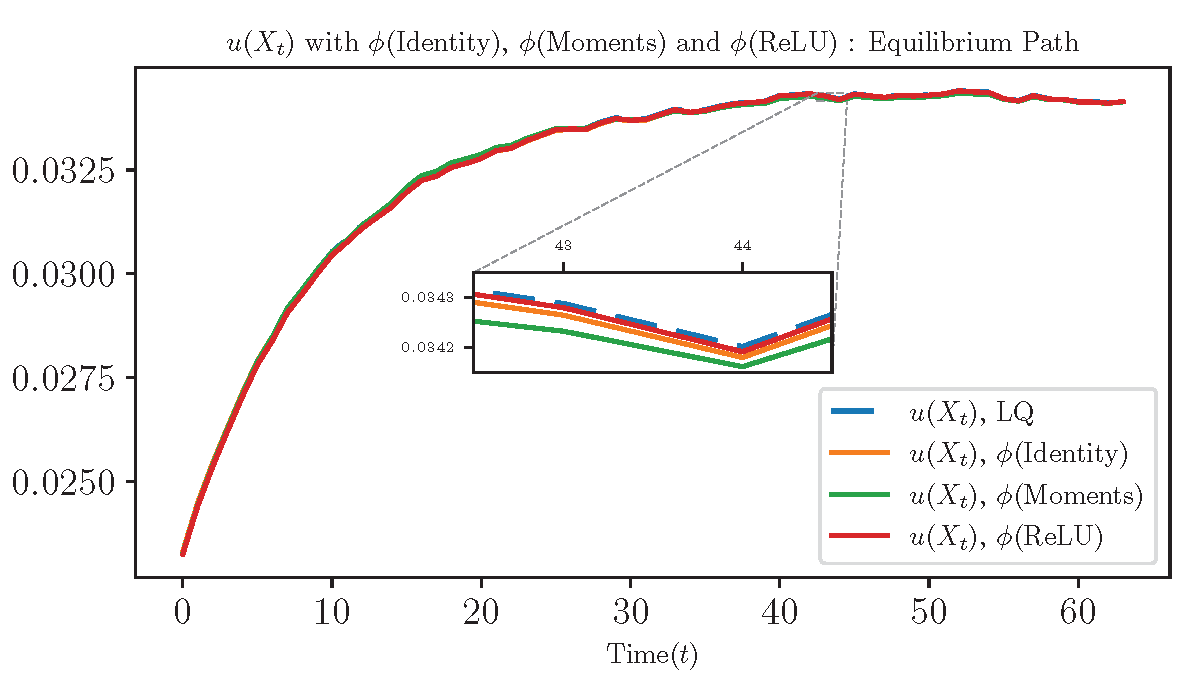
<figcaption aria-hidden="true">Comparison between LQ-regulator solution
and deep learning architectures for <span
class="math inline"><em>ν</em> = 1</span>, <span
class="math inline"><em>N</em> = 128</span></figcaption>
</figure>

## Linear Case: Policy Errors

<figure>
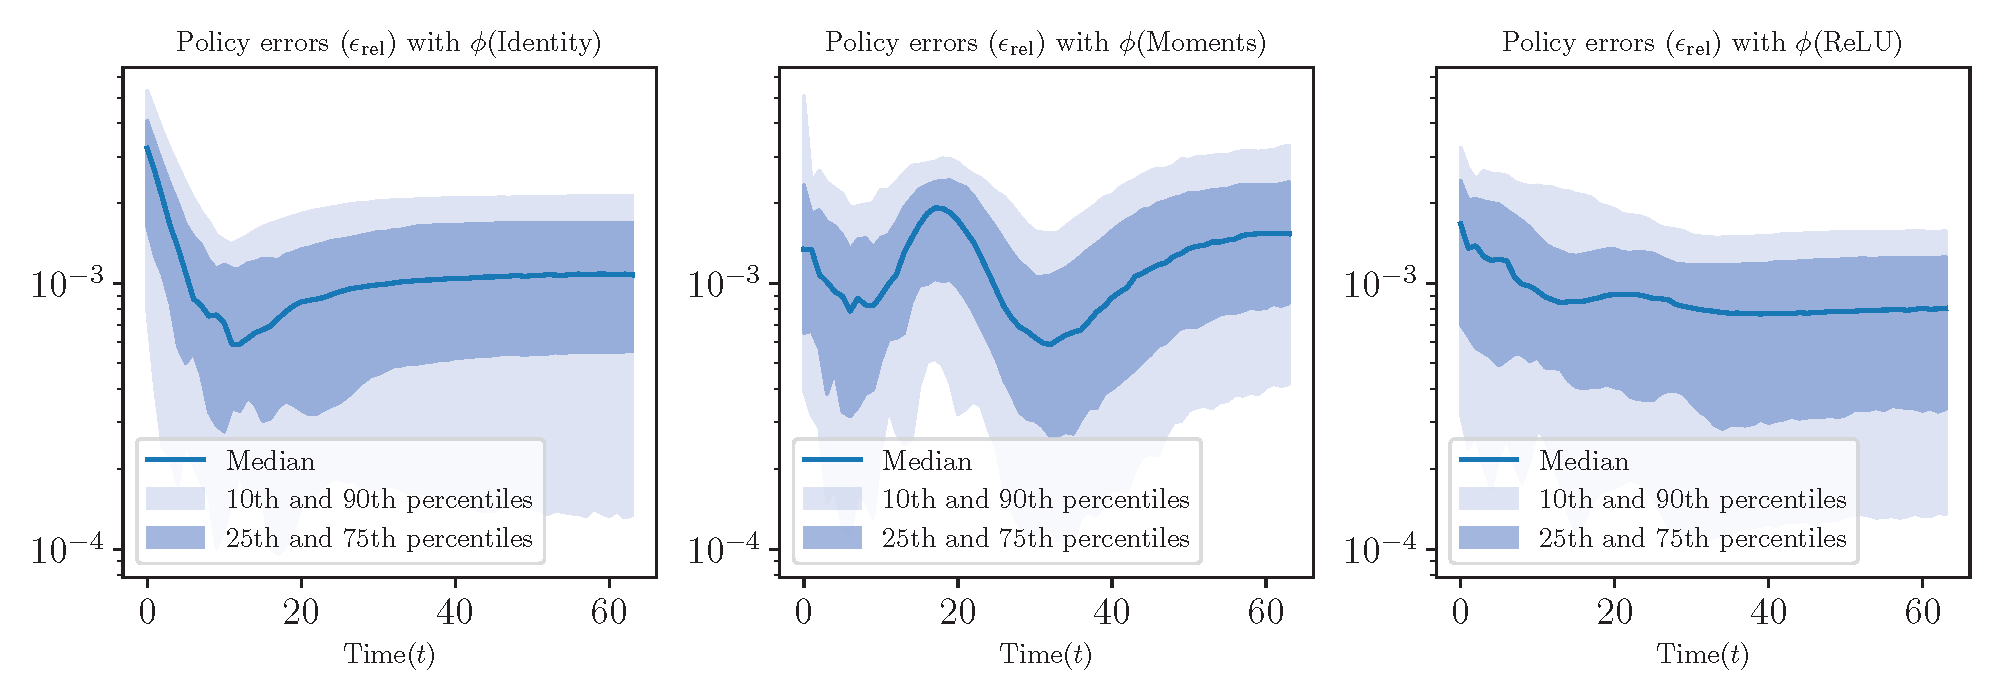
<figcaption aria-hidden="true">Policy errors for <span
class="math inline"><em>ν</em> = 1</span>, <span
class="math inline"><em>N</em> = 128</span>. Dark blue: median. Shaded:
10th-90th and 25th-75th percentiles.</figcaption>
</figure>

## Nonlinear Case: $\nu \neq 1$

-   Same code and algorithms - architecture did not have special case
    for $\nu$
-   Check accuracy via $\ell(u_{{\theta^*}}, \cdot)$ and transversality
    condition
-   Deep Sets outperforms moments-based architecture

<figure>
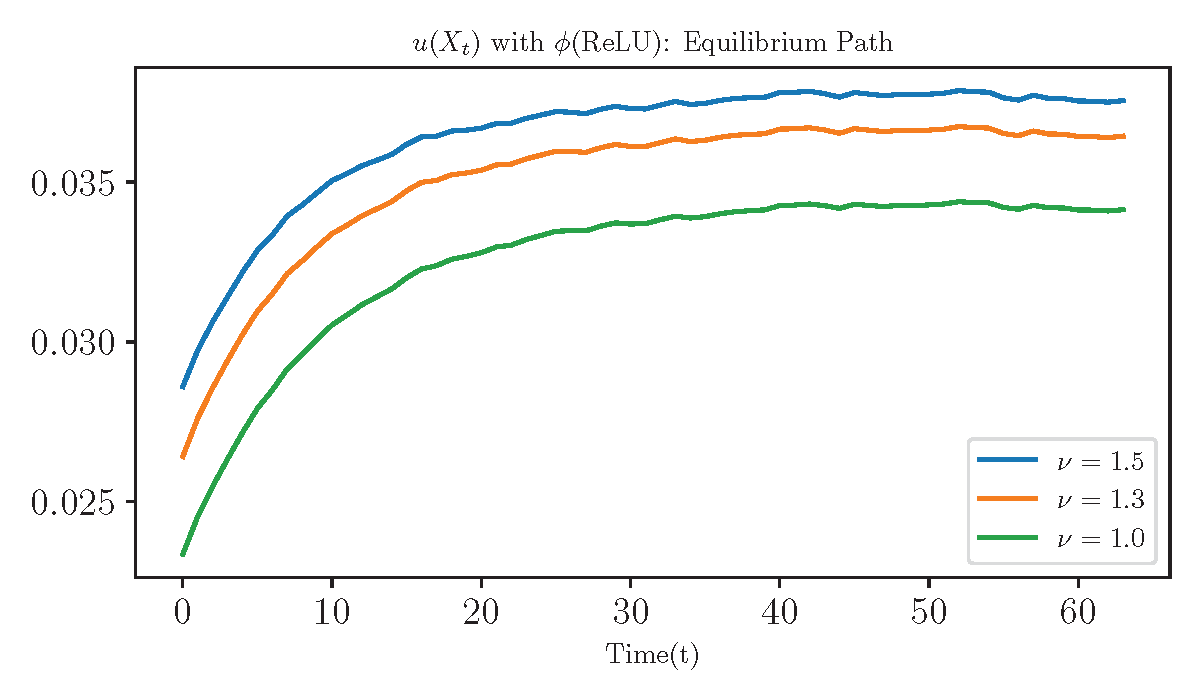
<figcaption aria-hidden="true">Optimal policy along equilibrium paths
for <span class="math inline"><em>ν</em> = [1.0, 1.3, 1.5]</span>, <span
class="math inline"><em>N</em> = 128</span></figcaption>
</figure>

## Nonlinear Case: Euler Residuals

<figure>
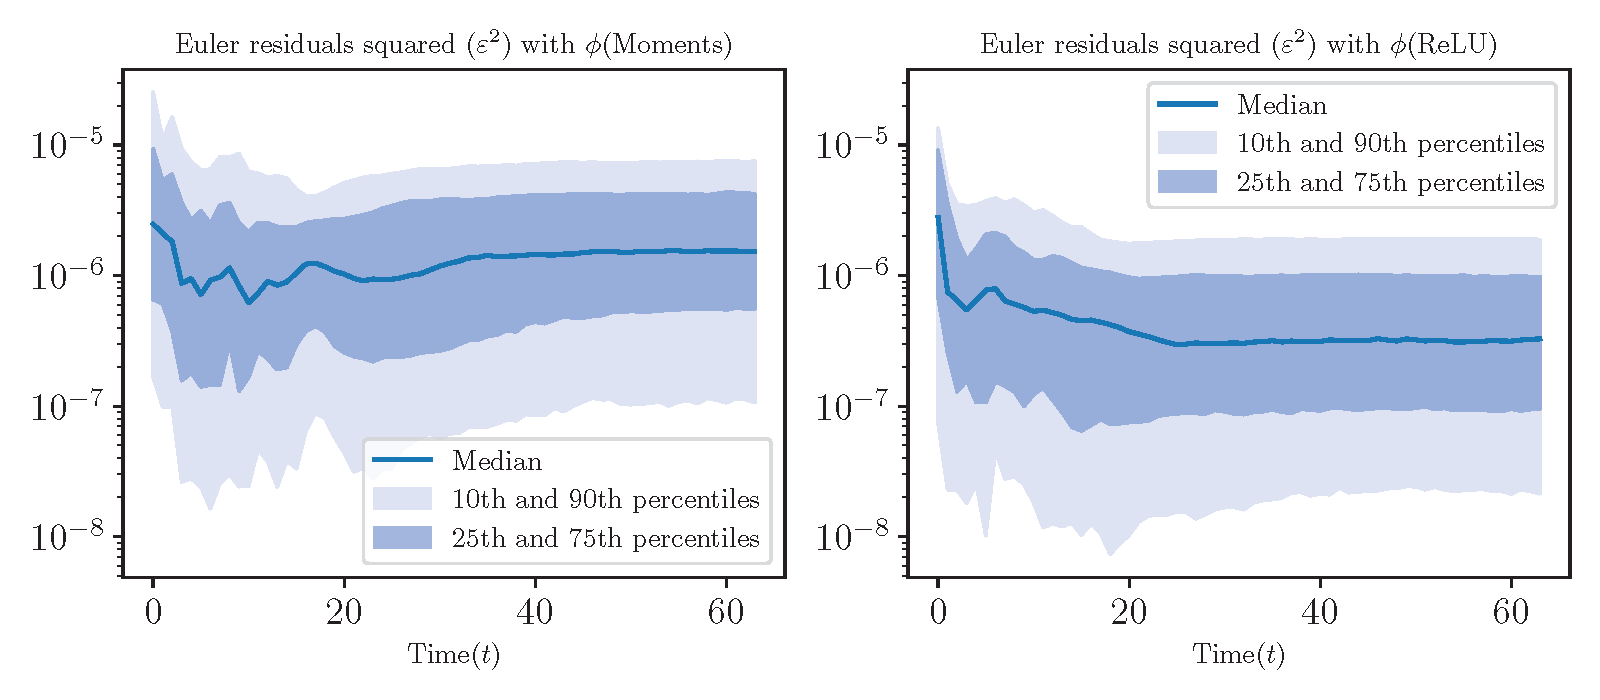
<figcaption aria-hidden="true">Euler residuals for <span
class="math inline"><em>ν</em> = 1.5</span>, <span
class="math inline"><em>N</em> = 128</span> comparing Moments and Deep
Sets</figcaption>
</figure>

## Key Insights

-   Solves $N = 128$ in seconds
-   Performance roughly independent of $N$
-   Deep Sets most robust across initial conditions (97% success vs
    48-59%)
-   Even if integer moments sufficient, learning $\phi_\theta$ may be
    innocuous

# Conclusion

## Summary

-   Solve heterogeneous agent macro models as **statistical learning
    problems**
    -   While not global in theory, may be global in practice
-   High dimensions can be a **blessing**, not a curse
-   Underlying complexity controlled by size of **latent aggregate
    state**, not number of agents
-   Key is concentration of measure when:
    1.  Computing conditional expectations over idiosyncratic shocks
    2.  Approximating functions of exchangeable state variables
-   **Deep learning** isn’t necessary in theory, but works very well in
    practice
-   Symmetry and exchangeability are powerful tools to exploit problem
    structure

# Appendices

## ML Papers in Economics

-   @fernandez2019financial, @MALIAR202176, @AzinovicEtAl,
    @han2022deepham, @payne2025deep
-   Many more in progress

## References